### Systemic Crisis Prediction in Africa

This project analyzes a dataset (1860-2014) from 13 African countries to predict systemic crisis emergence using indicators like annual inflation rates.

Dataset: [**Dataset Link**](**https://drive.google.com/file/d/1fTQ9R29kgAhInFO0HMqvkcAfSZWg6fCx/view**)

**Steps**

- Data Exploration

- Removed duplicates and addressed outliers using statistical methods.

- Encoded categorical features using Label Encoding.

- Selected the target variable and relevant features based on correlation analysis.

- Model Training and Evaluation

- Split data into training (80%) and test (20%) sets.

- Trained classification models (e.g., Logistic Regression, Random Forest).

- Evaluated using metrics like Accuracy, Precision, Recall and F1-Score.

- Explored hyperparameter tuning using RandomisedCV.

**Tools and Libraries**

- Python, Pandas, Numpy, Scikit-learn, Matplotlib, Seaborn, Pandas.

**Key Insights**

- Effective preprocessing improved model performance.

- Collaboration provided strategies for enhancement.

In [1]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [2]:
# Importing dataset using pandas
dataset = pd.read_csv(r"C:\Users\Pearl\OneDrive\Documents\GOMYCODE TRAINING\Machine_learning\Machine_Learning_Projects\Supervised_Learning\Systemic crisis prediction\African_crises_dataset.csv")

In [3]:
## Viewing dataset
dataset.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
# checking for null values
dataset.isnull().any()

country_number                     False
country_code                       False
country                            False
year                               False
systemic_crisis                    False
exch_usd                           False
domestic_debt_in_default           False
sovereign_external_debt_default    False
gdp_weighted_default               False
inflation_annual_cpi               False
independence                       False
currency_crises                    False
inflation_crises                   False
banking_crisis                     False
dtype: bool

In [6]:
dataset.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [7]:
encode = LabelEncoder()

In [8]:
## Encoding categorical variables using Label Encoder
def encoder(column):
    """This is a function to convert the categorical columns into numeric ones"""
    for col in column:
        dataset[col] = encode.fit_transform(dataset[col])
        print(encode.classes_)
    return column

In [9]:
encoder(["banking_crisis"])

['crisis' 'no_crisis']


['banking_crisis']

In [10]:
dataset.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


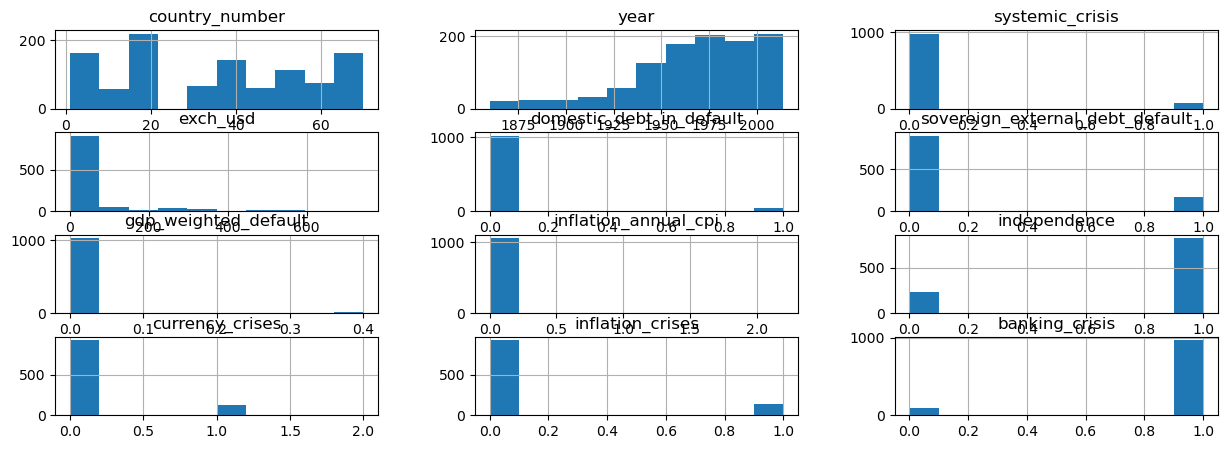

In [11]:
## checking for outliers
dataset.hist(figsize = (15,5));

In [12]:
## Normalizing data using standard scaler
from sklearn.preprocessing import StandardScaler

In [13]:
se = StandardScaler()

In [14]:
dataset2 = dataset[["inflation_annual_cpi"]]
scaled_data = se.fit_transform(dataset2)

In [15]:
df = pd.DataFrame(scaled_data)

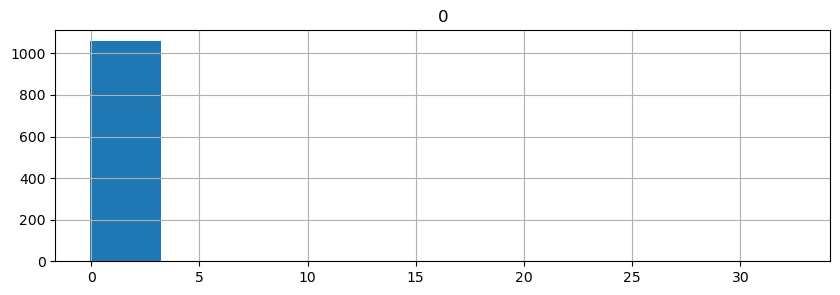

In [16]:
df.hist(figsize = (10,3));

In [17]:
dataset["inflation_annual_cpi"] = df

In [18]:
dataset.head(3)

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,-0.030863,0,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,-0.030848,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-0.030874,0,0,0,1


In [19]:
## checking out the correlation coefficient between the target and independent variables
df2 = dataset.iloc[:, 4:]

In [20]:
df2.corr()["systemic_crisis"]

systemic_crisis                    1.000000
exch_usd                           0.202687
domestic_debt_in_default           0.122158
sovereign_external_debt_default    0.249850
gdp_weighted_default               0.005274
inflation_annual_cpi               0.106452
independence                       0.147083
currency_crises                    0.112751
inflation_crises                   0.172562
banking_crisis                    -0.853702
Name: systemic_crisis, dtype: float64

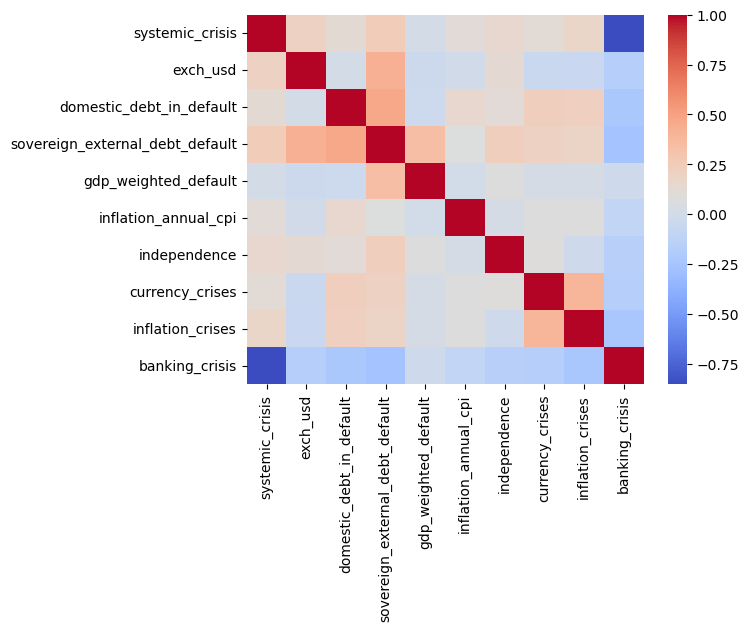

In [21]:
sns.heatmap(df2.corr(), cmap="coolwarm");

In [22]:
## Selecting the target and independent Variables
X = df2.drop(["systemic_crisis"], axis=1).values
y = df2.systemic_crisis

In [23]:
## splitting our dataset (training and testing)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(847, 9) (212, 9) (847,) (212,)


In [25]:
## Defining parameter grid
model_params = {
    "svm":{
        "model":SVC(gamma = "scale"),
        "params": {"C":[0.1, 1, 5, 10, 30, 100, 200], "kernel":["rbf", "linear", "poly"]}
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params":{"n_estimators": [1,5,10], "max_leaf_nodes": [10,50,100], "n_jobs": [20,40,60]
                 }
    },
    "logistic_regression": {"model": LogisticRegression(solver = "liblinear", multi_class = "auto"),
                            "params": {"C" : [0.1, 1, 5, 10, 30, 100, 200]
                                      }
                           },
     "XGBClassifier": {
        "model":XGBClassifier(),
        "params":{"n_estimators": [1,3,100,50], "max_depth": [5,10,15,20] 
                 }
                           },
    "decisiontree":
                    {"model":DecisionTreeClassifier(),
                     "params": {"splitter": ["best","random"], "min_samples_split": [2,3,4,5]}
                    },
    "KNN":
            {"model":KNeighborsClassifier(),
             "params":{"algorithm": ["auto","ball_tree","brute"], "n_jobs": [1,5,10,20], "leaf_size": [30,10,50,100]
                      }
            }
    
}

In [26]:
### Hyper-parameters tuning
from sklearn.model_selection import RandomizedSearchCV
scores = []
for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp["model"], mp["params"], cv = 5, return_train_score = False, n_iter = 2)
    clf.fit(X_train,y_train)
    scores.append({
    "model": model_name,
    "best_score": clf.best_score_,
    "best_params":clf.best_params_
    })


In [28]:
scores

[{'model': 'svm',
  'best_score': 0.9268151757744517,
  'best_params': {'kernel': 'poly', 'C': 5}},
 {'model': 'random_forest',
  'best_score': 0.978746954403063,
  'best_params': {'n_jobs': 20, 'n_estimators': 5, 'max_leaf_nodes': 100}},
 {'model': 'logistic_regression',
  'best_score': 0.9775704838148277,
  'best_params': {'C': 1}},
 {'model': 'XGBClassifier',
  'best_score': 0.9787399930386356,
  'best_params': {'n_estimators': 50, 'max_depth': 10}},
 {'model': 'decisiontree',
  'best_score': 0.9751896971806474,
  'best_params': {'splitter': 'best', 'min_samples_split': 4}},
 {'model': 'KNN',
  'best_score': 0.9374382178907066,
  'best_params': {'n_jobs': 1, 'leaf_size': 100, 'algorithm': 'auto'}}]

In [27]:
dff = pd.DataFrame(scores)
dff

,model,best_score,best_params
0,svm,0.926815,"{'kernel': 'poly', 'C': 5}"
1,random_forest,0.978747,"{'n_jobs': 20, 'n_estimators': 5, 'max_leaf_no..."
2,logistic_regression,0.977570,{'C': 1}
3,XGBClassifier,0.978740,"{'n_estimators': 50, 'max_depth': 10}"
4,decisiontree,0.975190,"{'splitter': 'best', 'min_samples_split': 4}"
5,KNN,0.937438,"{'n_jobs': 1, 'leaf_size': 100, 'algorithm': '..."


In [63]:
model = RandomForestClassifier(n_jobs = 20, n_estimators= 5, max_leaf_nodes= 100)

In [64]:
## Training the model
model.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=100, n_estimators=5, n_jobs=20)

In [65]:
y_pred = model.predict(X_test)

### Model Evaluation

In [82]:
out =pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [83]:
out

,actual,predicted
501,0,0
507,0,0
879,0,0
415,0,1
22,0,0
...,...,...
1017,0,0
753,0,0
998,0,0
926,0,0


In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
out=dataset.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'no_crisis',inplace=True)
out['actual'].replace(0,'crisis',inplace=True)
out['predicted'].replace(1,'no_crisis',inplace=True)
out['predicted'].replace(0,'crisis',inplace=True)


In [90]:
out[["country","year","actual","predicted"]].sample(10)
                            

,country,year,actual,predicted
693,Nigeria,2000,crisis,crisis
721,South Africa,1913,crisis,crisis
440,Kenya,1950,crisis,crisis
88,Angola,1924,crisis,crisis
888,Tunisia,2006,crisis,crisis
217,Central African Republic,2012,crisis,crisis
45,Algeria,1975,crisis,crisis
878,Tunisia,1996,crisis,crisis
196,Central African Republic,1991,no_crisis,no_crisis
191,Central African Republic,1986,crisis,crisis


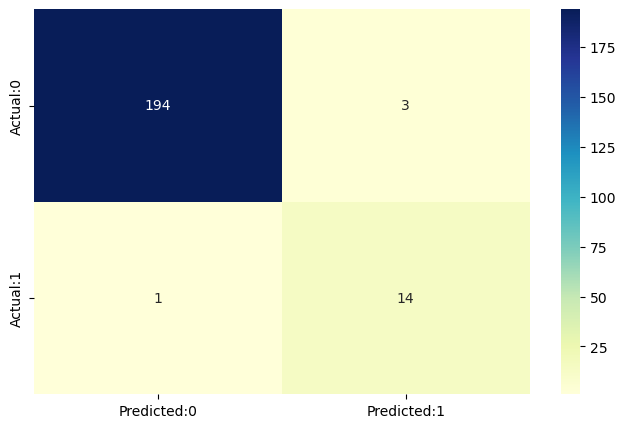

In [67]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "Predicted:1"], index = ["Actual:0", "Actual:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");

In [68]:
from sklearn.metrics import classification_report

In [72]:
C_Report = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n', C_Report)

Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.93      0.88        15
           0       0.99      0.98      0.99       197

    accuracy                           0.98       212
   macro avg       0.91      0.96      0.93       212
weighted avg       0.98      0.98      0.98       212

